# Recursive Text Editing: Result

In [1]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

__author__ = 'Shining'
__email__ = 'mrshininnnnn@gmail.com'

In [2]:
# dependency
# public
import os
%matplotlib inline
# private
from utils import *

## Increasing Sequence Length Analysis

In [826]:
# parameters
method = 'recursion' # end2end, recursion, tagging
data_src = 'nss' # aoi, nss
data_mode = 'online' # online, offline
# bi_gru_rnn_att, bi_lstm_rnn_att
model_name = 'bi_lstm_rnn_att'
num_size = 100
min_seq_len = 25
max_seq_len = 25
data_size = 10000
val_or_test = 'test' # val, test

In [827]:
# define path
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    data_mode, 
    model_name, 
    method, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}', 
    'data_size_{}'.format(data_size), 
    '{}.txt'.format(val_or_test))

In [828]:
# read data
raw_data_dict = {}
for i in range(min_seq_len, max_seq_len+1, 5):
    file_name = os.path.join(LOG_PATH.format(i))
    print(file_name)
    raw_data_dict[file_name] = load_txt(file_name)

log/nss/online/bi_lstm_rnn_att/recursion/num_size_100/seq_len_25/data_size_10000/test.txt


In [829]:
# keys = ['epoch', 'step', 'loss', 'acc', 'token_acc', 'seq_acc']
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [834]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Token Accuracy'
criteria_dict = {}
for i in range(min_seq_len, max_seq_len+1, 5):
    label = 'seq_len_{}'.format(i)
    key = LOG_PATH.format(i)
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

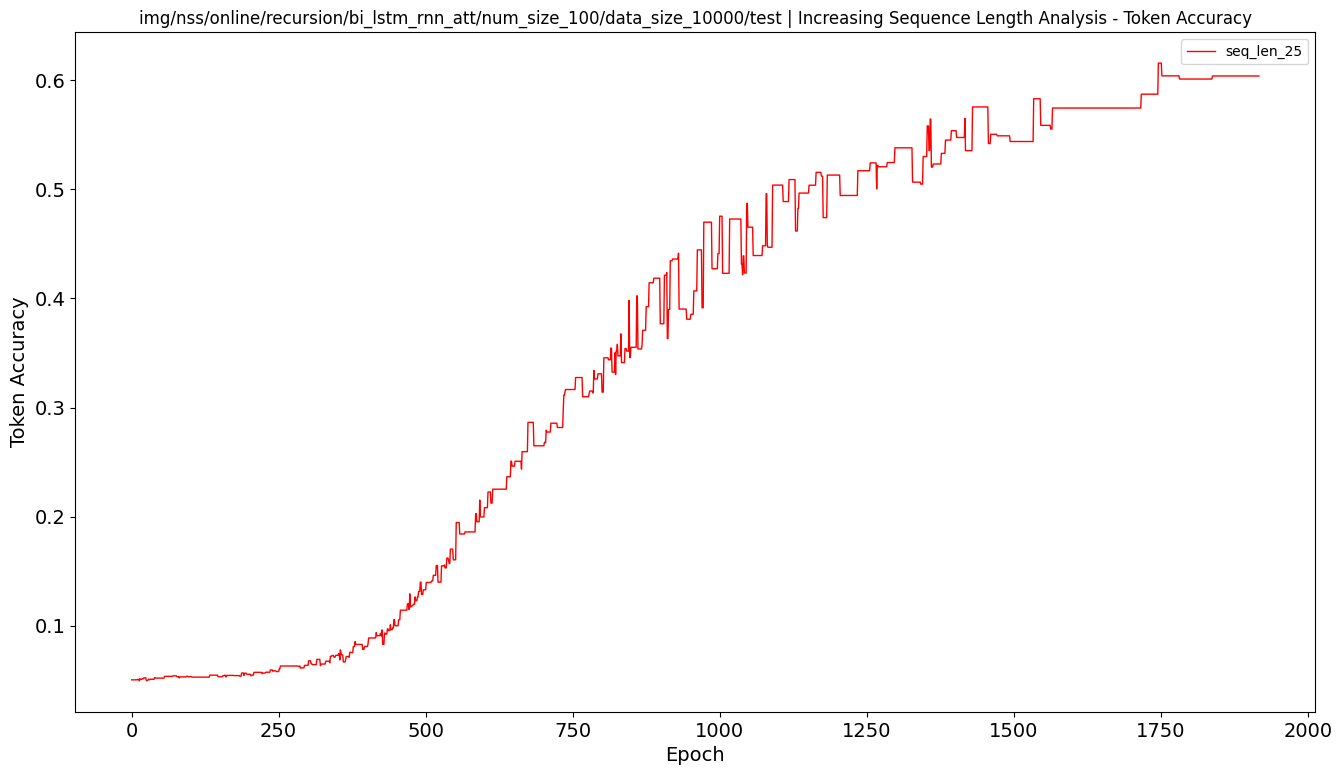

In [835]:
colors = ['red', 'orange', 'skyblue', 'green', 'blue', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    data_mode, 
    method, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Sequence Length Analysis - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Increasing Data Size Analysis

In [1057]:
# parameters
method = 'recursion' # end2end, recursion, tagging
data_src = 'aoi' # aoi, nss
data_mode = 'online' # online, offline
# bi_gru_rnn_att, bi_lstm_rnn_att
model_name = 'bi_lstm_rnn_att'
num_size = 10
seq_len = 5
min_data_size = 10000
max_data_size = 70000
val_or_test = 'test' # val, test

In [1058]:
# define path
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    data_mode, 
    model_name, 
    method,
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}', 
    '{}.txt'.format(val_or_test))

In [1059]:
# read data
raw_data_dict = {}
for i in range(min_data_size, max_data_size+1, 10000):
    file_name = LOG_PATH.format(i)
    print(file_name)
    raw_data_dict[file_name] = load_txt(file_name)

log/aoi/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_10000/test.txt
log/aoi/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_20000/test.txt
log/aoi/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_30000/test.txt
log/aoi/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_40000/test.txt
log/aoi/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_50000/test.txt
log/aoi/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_60000/test.txt
log/aoi/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_70000/test.txt


In [1060]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [1061]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Equation Accuracy'
criteria_dict = {}
for i in range(min_data_size, max_data_size+1, 10000):
    label = 'data_size_{}'.format(i)
    key = LOG_PATH.format(i)
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

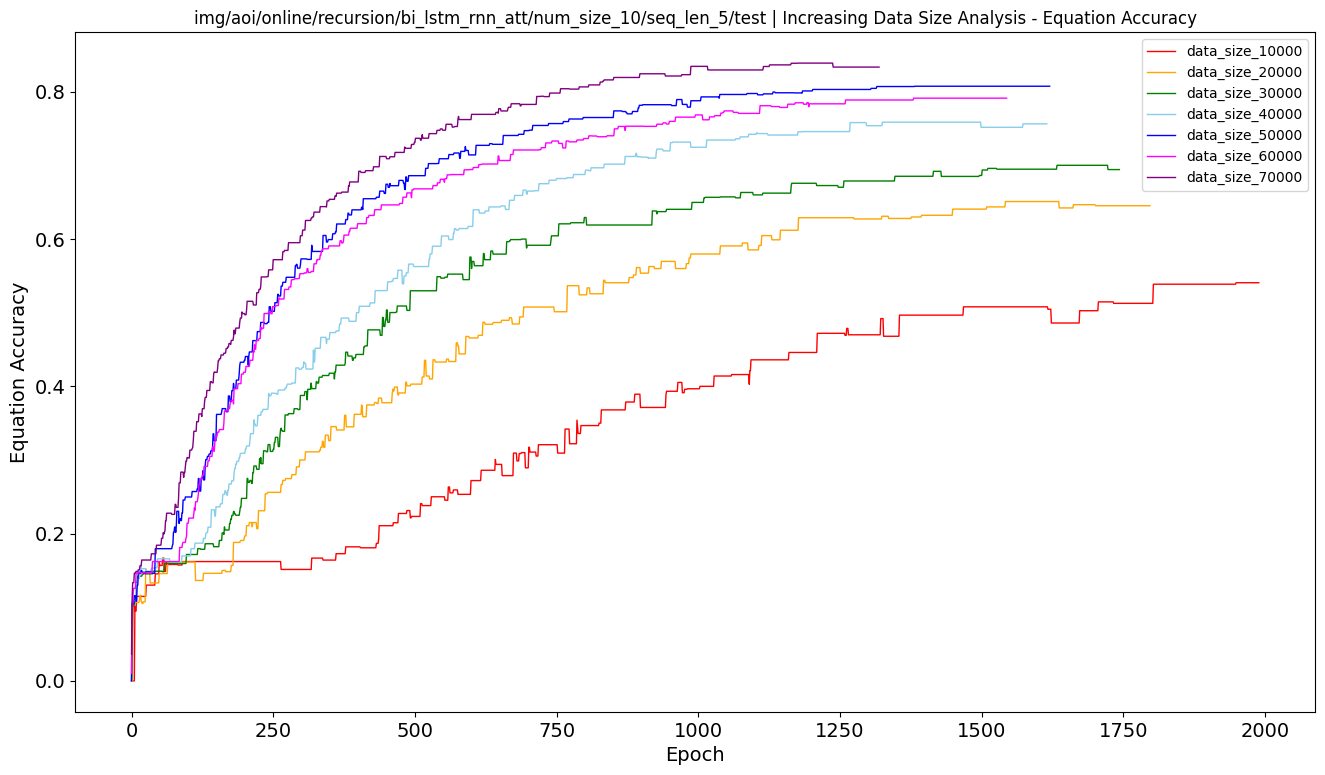

In [1062]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    data_mode, 
    method, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Data Size Analysis - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Methods Comparison

In [1051]:
# parameters
candidates = [
#     ['offline', 'end2end'], 
#     ['offline', 'recursion'], 
#     ['online', 'end2end'], 
#     ['offline', 'tagging'], 
    ['online', 'tagging'], 
    ['online', 'recursion']
]
data_src = 'aoi' # aoi, nss
model_name = 'bi_lstm_rnn_att'
num_size = 10
seq_len = 5
data_size = 60000
val_or_test = 'val' # val, test

In [1052]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    '{}', # data mode
    model_name, 
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size), 
    '{}.txt'.format(val_or_test))

In [1053]:
# read data
raw_data_dict = {}
for c in candidates:
    file_path = LOG_PATH.format(c[0], c[1])
    print(file_path)
    raw_data_dict[file_path] = load_txt(file_path)

log/aoi/online/bi_lstm_rnn_att/tagging/num_size_10/seq_len_5/data_size_60000/val.txt
log/aoi/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_60000/val.txt


In [1054]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [1055]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Token Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    key = LOG_PATH.format(c[0], c[1])
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

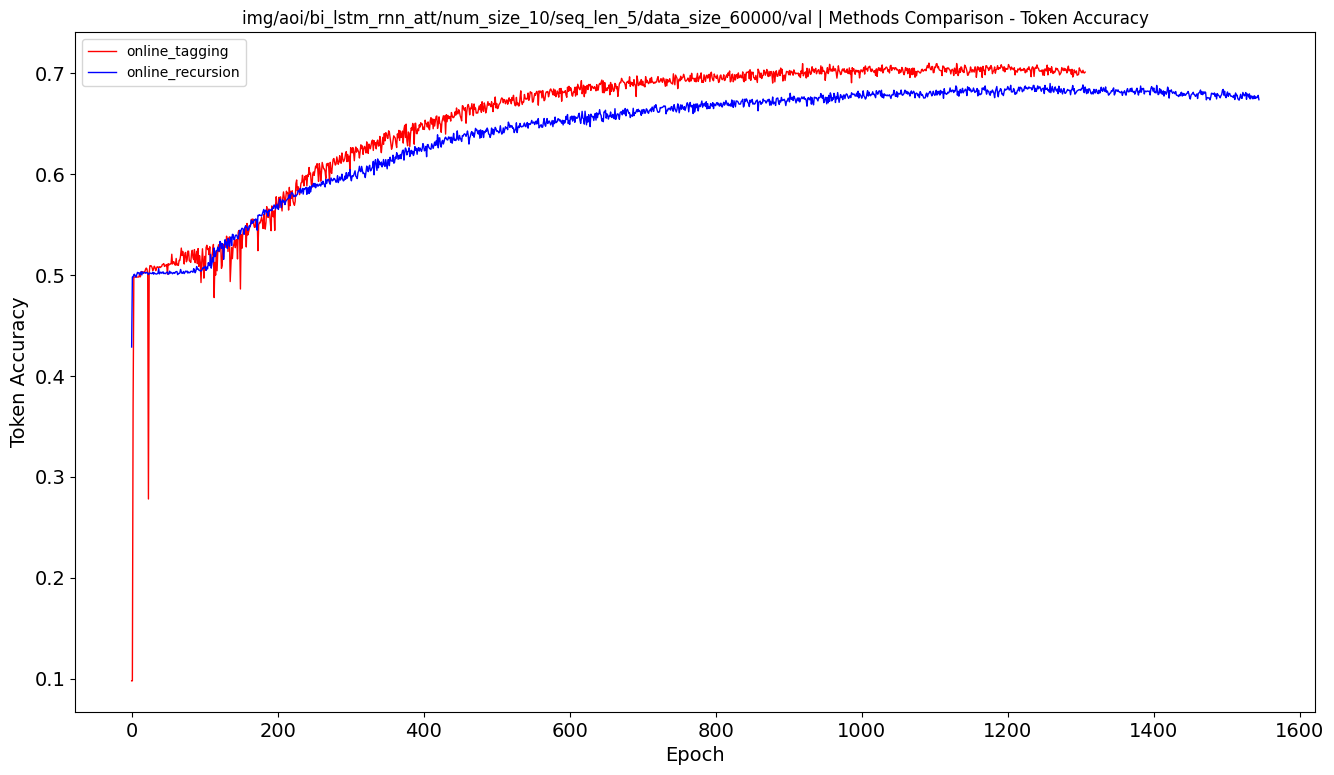

In [1056]:
colors = ['red', 'blue', 'green', 'skyblue', 'orange', 'magenta', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Methods vs. Sequence Length

In [634]:
# parameters
candidates = [
    ['offline', 'end2end'], 
#     ['offline', 'recursion'], 
    ['online', 'end2end'], 
#     ['online', 'tagging'], 
    ['online', 'recursion']
]
# aoi, nss
data_src = 'nss'
model_name = 'bi_lstm_rnn_att'
num_size = 10
data_size = 10000
min_seq_len = 25
max_seq_len = 30
val_or_test = 'val' # val, test

In [635]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    '{}'.format(data_src), 
    '{}', # data mode
    '{}'.format(model_name),
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}', # sequence length
    'data_size_{}'.format(data_size),
    '{}.txt'.format(val_or_test))

In [636]:
# read data
raw_data_dict = {}
for c in candidates: 
    for i in range(min_seq_len, max_seq_len+1, 5): 
        file_name = LOG_PATH.format(c[0], c[1], i)
        print(file_name)
        raw_data_dict[file_name] = load_txt(file_name)[40:-4]

log/nss/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_25/data_size_10000/val.txt
log/nss/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_30/data_size_10000/val.txt
log/nss/online/bi_lstm_rnn_att/end2end/num_size_10/seq_len_25/data_size_10000/val.txt
log/nss/online/bi_lstm_rnn_att/end2end/num_size_10/seq_len_30/data_size_10000/val.txt
log/nss/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_25/data_size_10000/val.txt
log/nss/online/bi_lstm_rnn_att/recursion/num_size_10/seq_len_30/data_size_10000/val.txt


In [637]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [640]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    criteria_list = []
    for i in range(min_seq_len, max_seq_len+1, 5): 
        key = LOG_PATH.format(c[0], c[1], i)
        criteria_list.append(data_dict[key][-1][criteria])
    criteria_dict[label] = criteria_list

In [642]:
print(criteria_dict)

{'offline_end2end': [0.3453, 0.0], 'online_end2end': [0.1053, 0.4853], 'online_recursion': [0.8733, 0.874]}


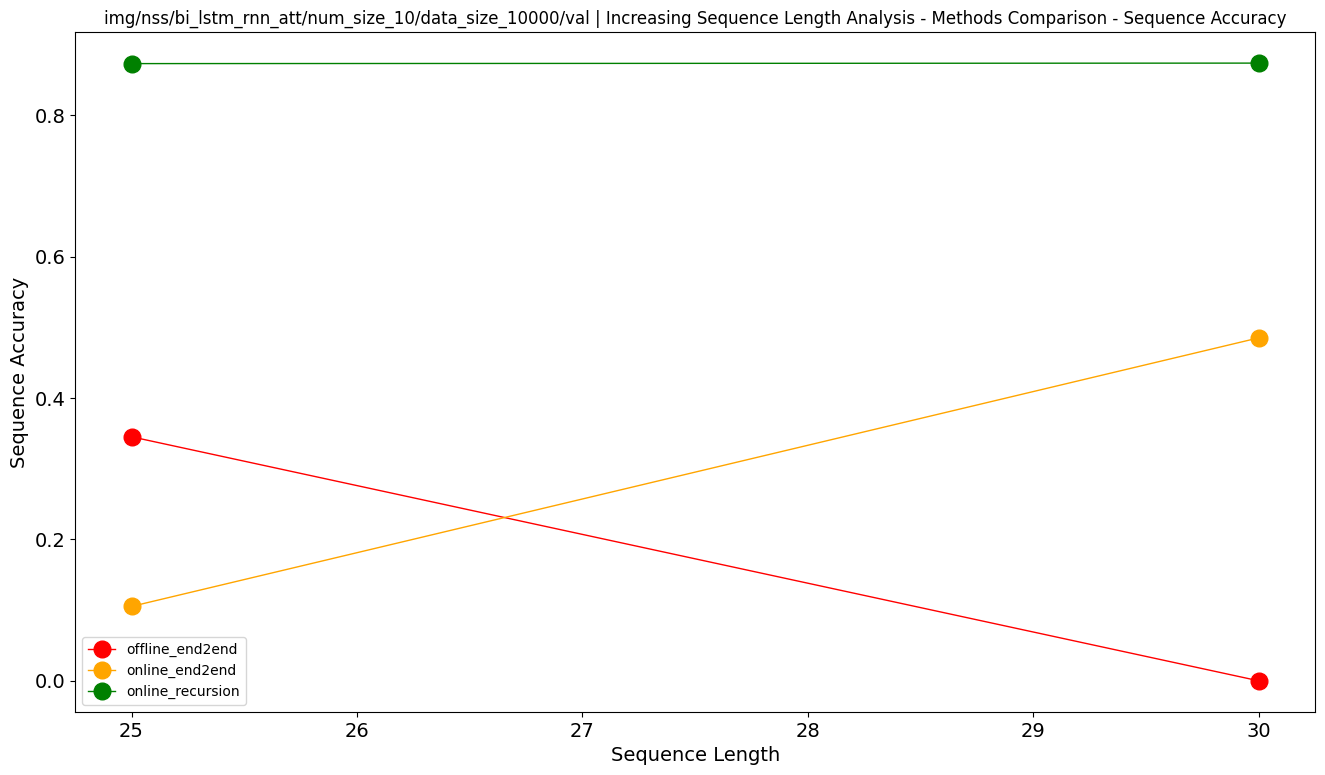

In [641]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img',
    '{}'.format(data_src), 
    model_name, 
    'num_size_{}'.format(num_size), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Sequence Length Analysis - Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Sequence Length', 
    ylabel=criteria, 
    save_path=save_path, 
    yticks=range(min_seq_len, max_seq_len+1, 5), 
    marker=True
)

## Methods vs. Data Size

In [1038]:
# parameters
candidates = [
    ['offline', 'end2end'], 
    ['offline', 'recursion'], 
    ['online', 'end2end'], 
#     ['offline', 'tagging'],
    ['online', 'tagging'], 
    ['online', 'recursion']
]
# aoi, nss
data_src = 'aoi'
model_name = 'bi_lstm_rnn_att'
num_size = 10
seq_len = 5
min_data_size = 10000
max_data_size = 70000
val_or_test = 'test' # val, test

In [1039]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    '{}'.format(data_src), 
    '{}', # data mode
    '{}'.format(model_name),
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}', # data size 
    '{}.txt'.format(val_or_test))

In [1040]:
# read data
raw_data_dict = {}
for c in candidates: 
    for i in range(min_data_size, max_data_size+1, 10000): 
        file_name = LOG_PATH.format(c[0], c[1], i)
        print(file_name)
        raw_data_dict[file_name] = load_txt(file_name)

log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_10000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_20000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_30000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_40000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_50000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_60000/test.txt
log/aoi/offline/bi_lstm_rnn_att/end2end/num_size_10/seq_len_5/data_size_70000/test.txt
log/aoi/offline/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_10000/test.txt
log/aoi/offline/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_20000/test.txt
log/aoi/offline/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_30000/test.txt
log/aoi/offline/bi_lstm_rnn_att/recursion/num_size_10/seq_len_5/data_size_40000/test.txt
log/aoi/offline/bi_lstm_rnn_att/rec

In [1041]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [1042]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    criteria_list = []
    for i in range(min_data_size, max_data_size+1, 10000):
        key = LOG_PATH.format(c[0], c[1], i)
#         print(key)
        criteria_list.append(data_dict[key][-1][criteria])
    criteria_dict[label] = criteria_list

In [1043]:
print(criteria_dict)

{'offline_end2end': [0.1027, 0.1423, 0.2116, 0.237, 0.2635, 0.2654, 0.259], 'offline_recursion': [0.1293, 0.166, 0.1767, 0.2165, 0.2309, 0.2363, 0.2645], 'online_end2end': [0.156, 0.24, 0.1913, 0.3293, 0.336, 0.3523, 0.3741], 'online_tagging': [0.0767, 0.32, 0.3349, 0.3977, 0.4084, 0.4329, 0.416], 'online_recursion': [0.266, 0.3353, 0.3602, 0.4058, 0.4251, 0.4151, 0.4449]}


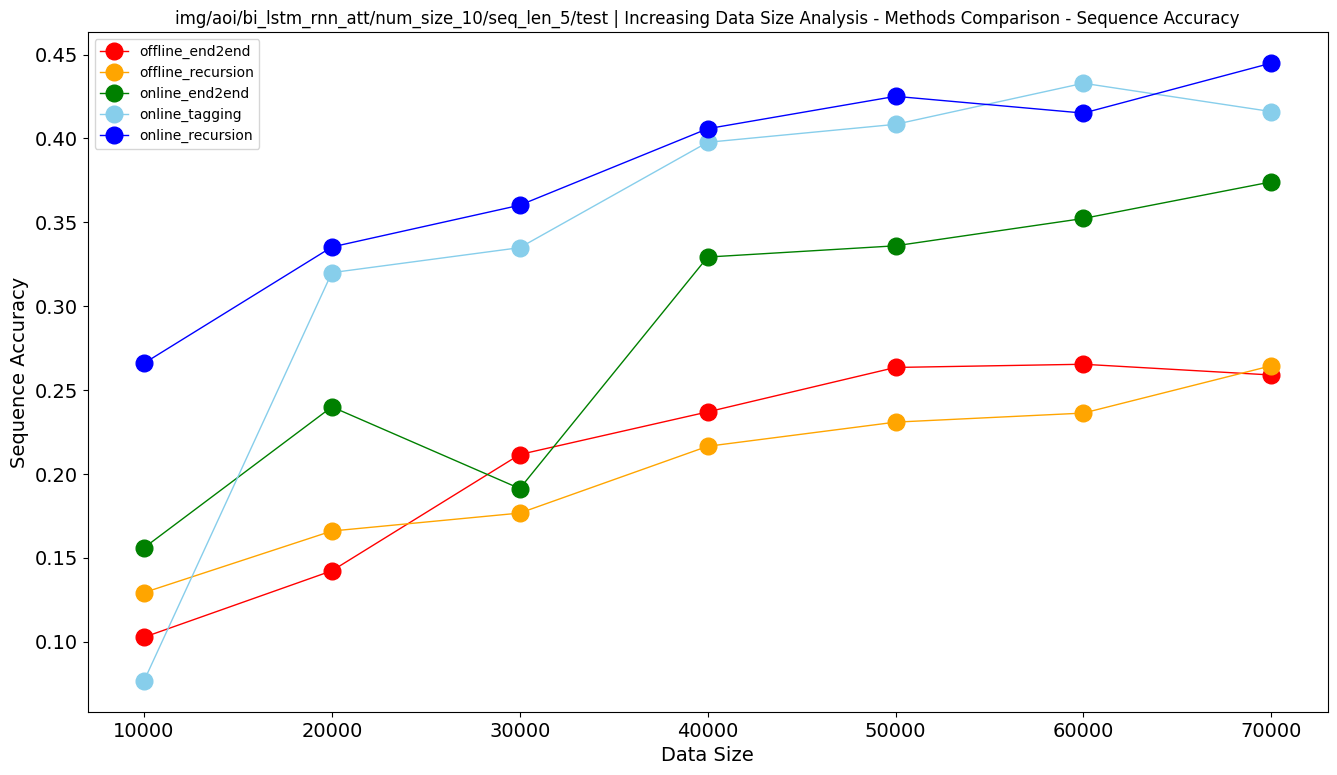

In [1044]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img',
    '{}'.format(data_src), 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Data Size Analysis - Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Data Size', 
    ylabel=criteria, 
    save_path=save_path, 
    yticks=range(min_data_size, max_data_size+1, 10000), 
    marker=True
)